<a href="https://colab.research.google.com/github/naqirraza99/Algorithm-in-Real-World-Scenarios/blob/main/City_Map_Using_BFS%26UCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Representation**


First, we need to represent the map as a data structure. We’ll use a graph where nodes represent locations and edges represent roads with distances.

We’ll represent the map of **Pakistan** with 10 cities and the distances between them.

In [ ]:
graph = {
    'Karachi': {'Hyderabad': 160, 'Quetta': 690},
    'Hyderabad': {'Karachi': 160, 'Sukkur': 300},
    'Quetta': {'Karachi': 690, 'Multan': 830},
    'Sukkur': {'Hyderabad': 300, 'Multan': 400},
    'Multan': {'Quetta': 830, 'Sukkur': 400, 'Lahore': 340},
    'Lahore': {'Multan': 340, 'Islamabad': 380},
    'Islamabad': {'Lahore': 380, 'Peshawar': 180},
    'Peshawar': {'Islamabad': 180, 'Mardan': 60},
    'Mardan': {'Peshawar': 60, 'Swat': 110},
    'Swat': {'Mardan': 110}
}


**2. Breadth-First Search (BFS)**

BFS explores all nodes at the present depth level before moving on to nodes at the next depth level. It is useful for finding the shortest path in an unweighted graph.

Here’s the implementation of BFS:

In [ ]:
from collections import deque

def bfs(graph, start, goal):
    queue = deque([[start]])
    visited = set()

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node in visited:
            continue

        for neighbor in graph[node]:
            new_path = list(path)
            new_path.append(neighbor)
            queue.append(new_path)

            if neighbor == goal:
                return new_path

        visited.add(node)

    return None

# Example usage
start = 'Karachi'
goal = 'Swat'
bfs_path = bfs(graph, start, goal)
print("BFS Path:", bfs_path)


**3. Uniform Cost Search (UCS)**


UCS is similar to BFS but considers the cost of the path. It always expands the least cost node first.

Here’s the implementation of UCS:

In [ ]:
import heapq

def ucs(graph, start, goal):
    queue = [(0, [start])]
    visited = set()

    while queue:
        cost, path = heapq.heappop(queue)
        node = path[-1]

        if node in visited:
            continue

        if node == goal:
            return path, cost

        for neighbor, weight in graph[node].items():
            new_cost = cost + weight
            new_path = list(path)
            new_path.append(neighbor)
            heapq.heappush(queue, (new_cost, new_path))

        visited.add(node)

    return None, float('inf')

# Example usage
ucs_path, ucs_cost = ucs(graph, start, goal)
print("UCS Path:", ucs_path, "with cost:", ucs_cost)


**4. Comparison and Analysis**

**BFS:**

**Path Length:** Finds the shortest path in terms of the number of edges.
Time Complexity: (O(V + E)), where (V) is the number of vertices and (E) is the number of edges.

**Space Complexity:** (O(V)) for the queue and visited set.


**UCS:**

**Path Length:** Finds the shortest path in terms of total cost.

**Time Complexity:** (O((V + E) \log V)) due to the priority queue operations.

**Space Complexity:** (O(V)) for the priority queue and visited set.


**Advantages and Disadvantages:**

**BFS:** Simple and effective for unweighted graphs. However, it does not consider path costs.

**UCS:** Considers path costs, making it suitable for weighted graphs. However, it can be more computationally intensive due to priority queue operations.

**5. Visualization**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, bfs_path, ucs_path):
    G = nx.Graph()

    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(bfs_path, bfs_path[1:])), edge_color='r', width=2, label='BFS Path')
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(ucs_path, ucs_path[1:])), edge_color='g', width=2, style='dashed', label='UCS Path')

    plt.legend()
    plt.show()

visualize_graph(graph, bfs_path, ucs_path)


**Complete Code**

BFS Path: ['Karachi', 'Quetta', 'Multan', 'Lahore', 'Islamabad', 'Peshawar', 'Mardan', 'Swat']
UCS Path: ['Karachi', 'Hyderabad', 'Sukkur', 'Multan', 'Lahore', 'Islamabad', 'Peshawar', 'Mardan', 'Swat'] with cost: 1930


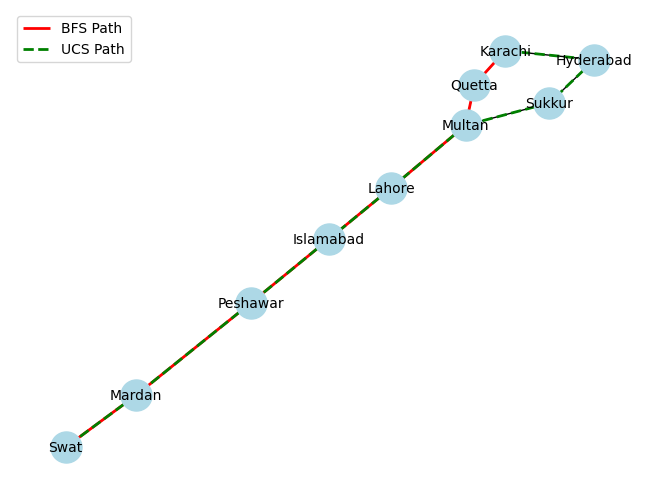

In [4]:
import heapq
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Data Representation
graph = {
    'Karachi': {'Hyderabad': 160, 'Quetta': 690},
    'Hyderabad': {'Karachi': 160, 'Sukkur': 300},
    'Quetta': {'Karachi': 690, 'Multan': 830},
    'Sukkur': {'Hyderabad': 300, 'Multan': 400},
    'Multan': {'Quetta': 830, 'Sukkur': 400, 'Lahore': 340},
    'Lahore': {'Multan': 340, 'Islamabad': 380},
    'Islamabad': {'Lahore': 380, 'Peshawar': 180},
    'Peshawar': {'Islamabad': 180, 'Mardan': 60},
    'Mardan': {'Peshawar': 60, 'Swat': 110},
    'Swat': {'Mardan': 110}
}

# BFS Algorithm
def bfs(graph, start, goal):
    queue = deque([[start]])
    visited = set()

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node in visited:
            continue

        for neighbor in graph[node]:
            new_path = list(path)
            new_path.append(neighbor)
            queue.append(new_path)

            if neighbor == goal:
                return new_path

        visited.add(node)

    return None

# UCS Algorithm
def ucs(graph, start, goal):
    queue = [(0, [start])]
    visited = set()

    while queue:
        cost, path = heapq.heappop(queue)
        node = path[-1]

        if node in visited:
            continue

        if node == goal:
            return path, cost

        for neighbor, weight in graph[node].items():
            new_cost = cost + weight
            new_path = list(path)
            new_path.append(neighbor)
            heapq.heappush(queue, (new_cost, new_path))

        visited.add(node)

    return None, float('inf')

# Example usage
start = 'Karachi'
goal = 'Swat'
bfs_path = bfs(graph, start, goal)
ucs_path, ucs_cost = ucs(graph, start, goal)

print("BFS Path:", bfs_path)
print("UCS Path:", ucs_path, "with cost:", ucs_cost)

# Visualization
def visualize_graph(graph, bfs_path, ucs_path):
    G = nx.Graph()

    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(bfs_path, bfs_path[1:])), edge_color='r', width=2, label='BFS Path')
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(ucs_path, ucs_path[1:])), edge_color='g', width=2, style='dashed', label='UCS Path')

    plt.legend()
    plt.show()

visualize_graph(graph, bfs_path, ucs_path)
